In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [8]:
import os
import shutil

# Prompt user for the input directory path
base_dir = "/kaggle/working/Data"

# Validate input directory
if not os.path.exists(base_dir):
    print("Error: The provided directory does not exist. Please check the path and try again.")
    exit()
output_dir = "/kaggle/working/DS/"
# Define train and test output directories
output_train = os.path.join(output_dir, 'train')
output_test = os.path.join(output_dir, 'test')

# Ensure train and test directories exist
os.makedirs(output_train, exist_ok=True)
os.makedirs(output_test, exist_ok=True)

# Crop names and their corresponding disease folders
crops = ['Cashew', 'Cassava', 'Maize', 'Tomato']

# Function to restructure directories
def restructure_dataset():
    for crop in crops:
        crop_dir = os.path.join(base_dir, crop)
        for data_split in ['train_set', 'test_set']:
            split_path = os.path.join(crop_dir, data_split)
            if not os.path.exists(split_path):
                continue

            for category in os.listdir(split_path):
                category_path = os.path.join(split_path, category)
                if os.path.isdir(category_path):
                    # Append crop name to the category
                    new_name = f"{category.replace(' ', '_')}_{crop.lower()}"
                    target_dir = output_train if 'train' in data_split else output_test
                    shutil.move(category_path, os.path.join(target_dir, new_name))

# Run the restructuring
restructure_dataset()
print("Dataset restructuring completed!")


Dataset restructuring completed!


In [9]:
dataset_path = "/kaggle/working/DS/"

train_dir = os.path.join(dataset_path, 'train')
test_dir = os.path.join(dataset_path, 'test')

# Change this code

In [10]:
train_data = ImageDataGenerator(rescale=1.0/255) 
test_data = ImageDataGenerator(rescale=1.0/255)


train_generator = train_data.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'    
)

test_generator = test_data.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

print("Classes found in the dataset:", train_generator.class_indices)

# Do not change this code

Found 74317 images belonging to 22 classes.
Found 24981 images belonging to 22 classes.
Classes found in the dataset: {'anthracnose_cashew': 0, 'bacterial_blight_cassava': 1, 'brown_spot_cassava': 2, 'fall_armyworm_maize': 3, 'grasshoper_maize': 4, 'green_mite_cassava': 5, 'gumosis_cashew': 6, 'healthy_cashew': 7, 'healthy_cassava': 8, 'healthy_maize': 9, 'healthy_tomato': 10, 'leaf_beetle_maize': 11, 'leaf_blight_maize': 12, 'leaf_blight_tomato': 13, 'leaf_curl_tomato': 14, 'leaf_miner_cashew': 15, 'leaf_spot_maize': 16, 'mosaic_cassava': 17, 'red_rust_cashew': 18, 'septoria_leaf_spot_tomato': 19, 'streak_virus_maize': 20, 'verticulium_wilt_tomato': 21}


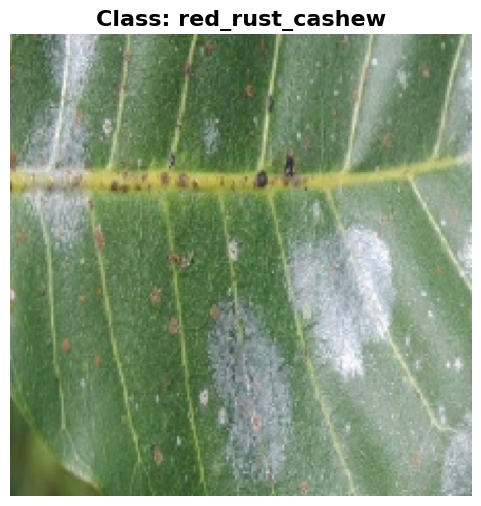

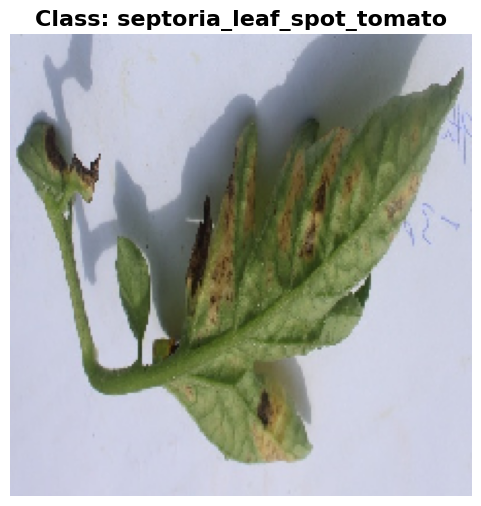

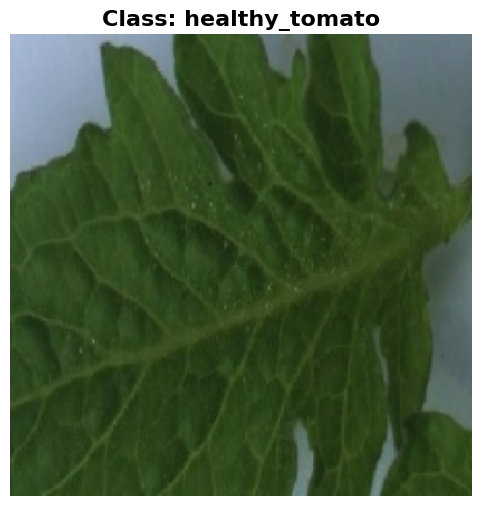

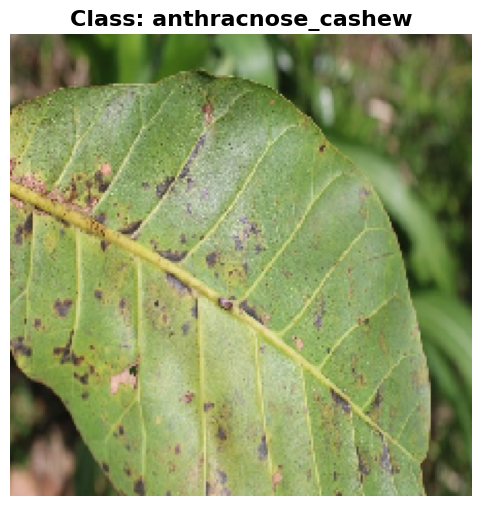

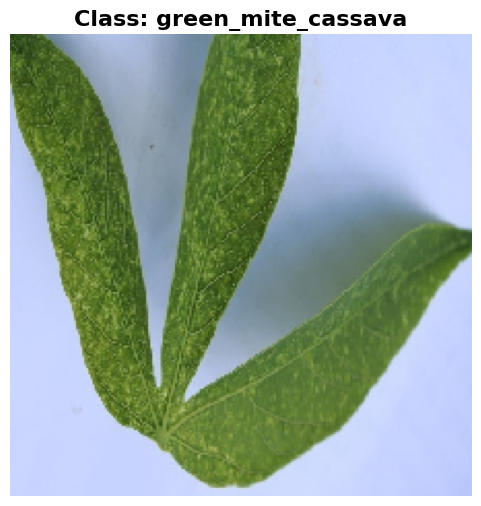

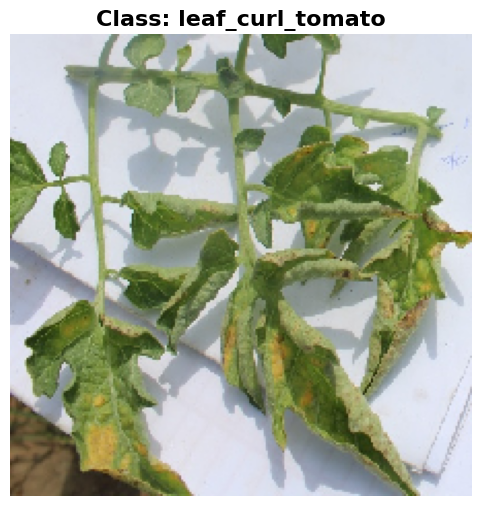

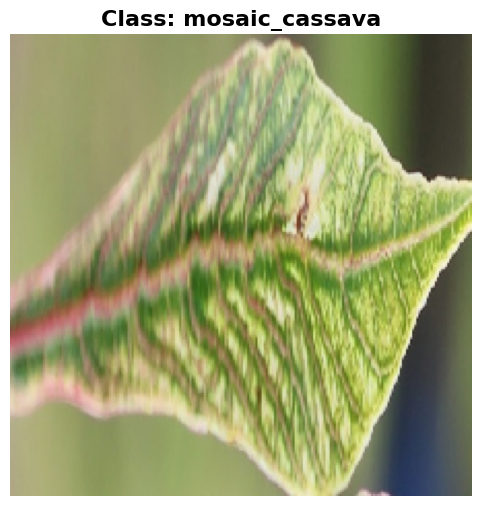

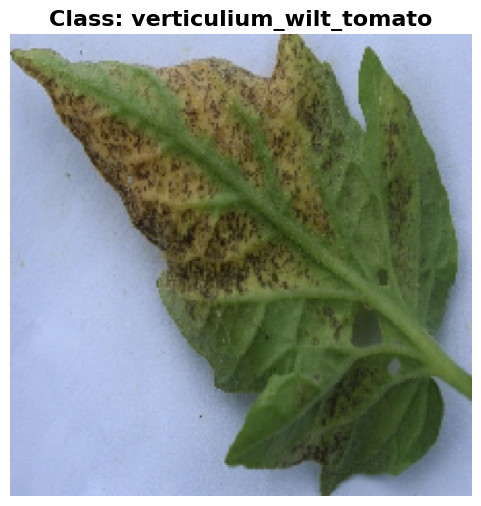

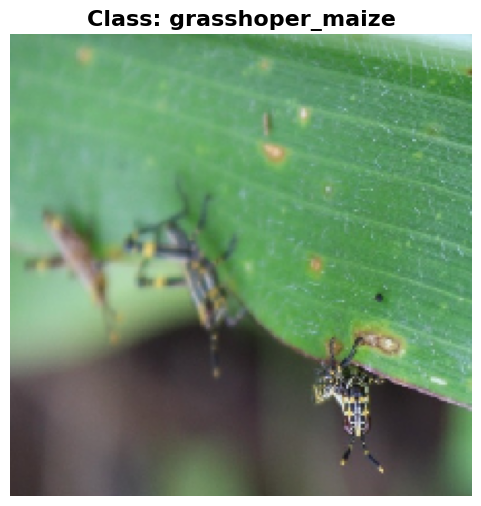

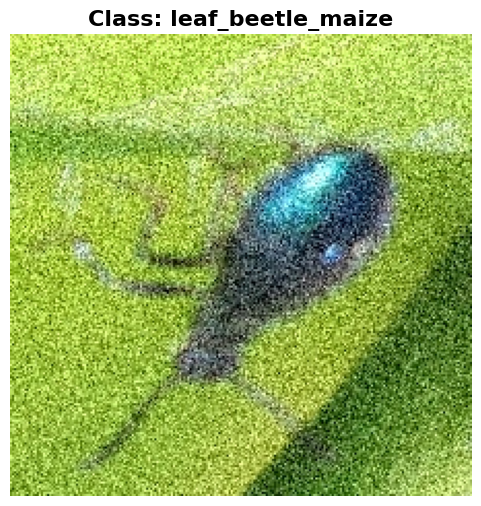

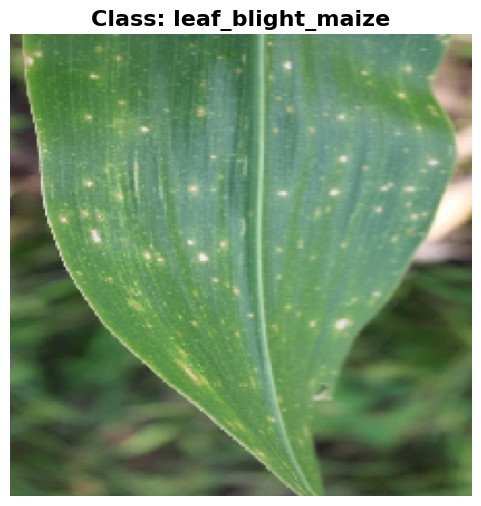

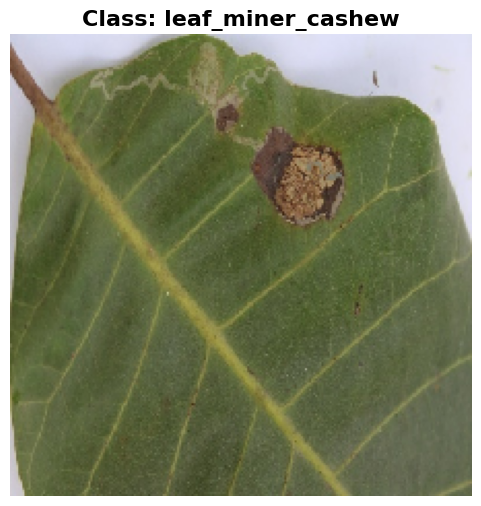

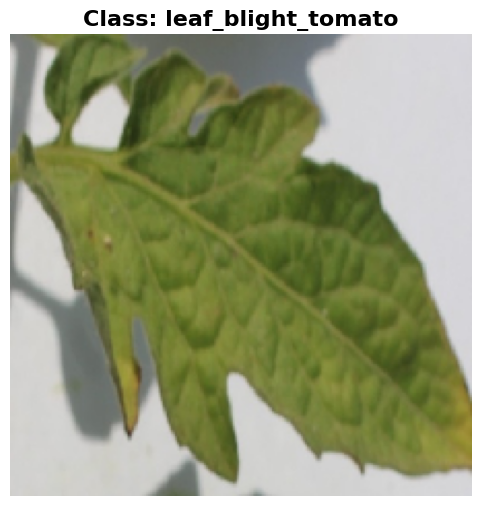

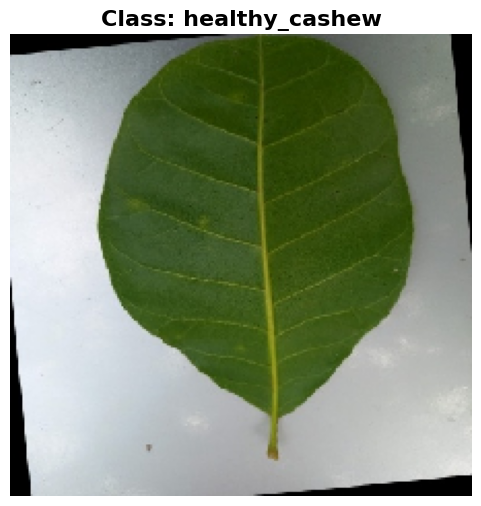

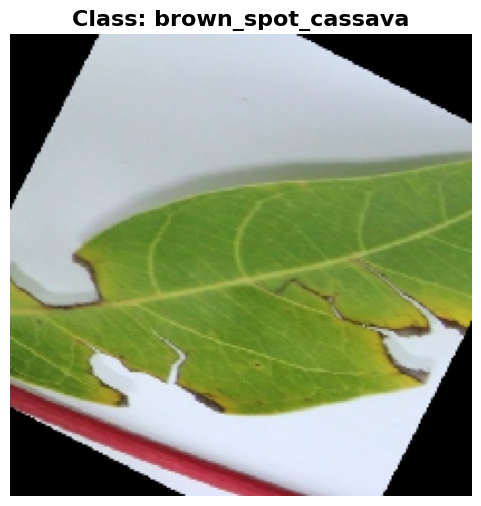

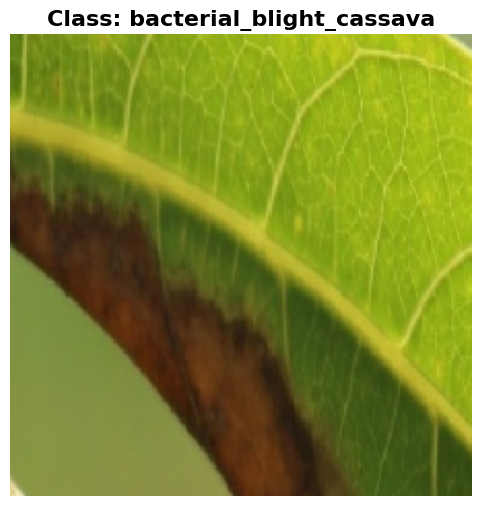

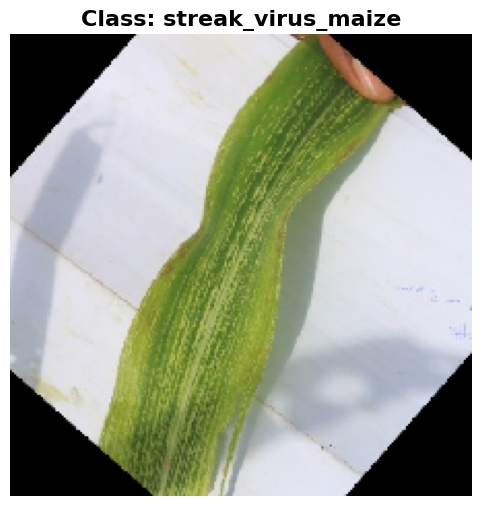

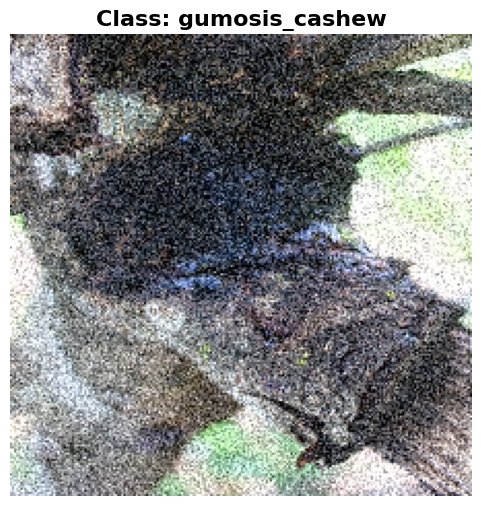

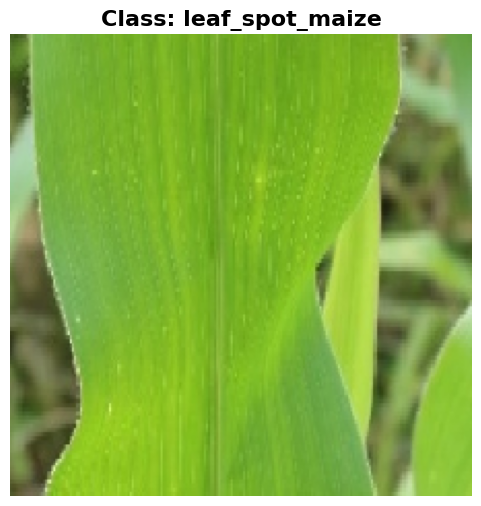

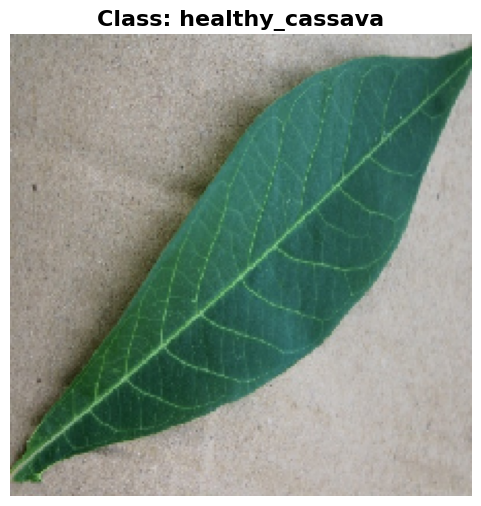

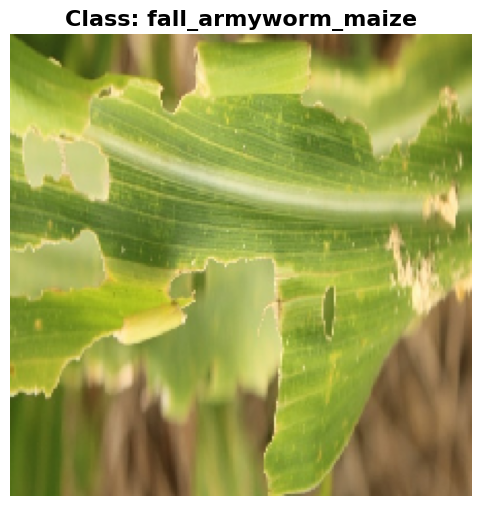

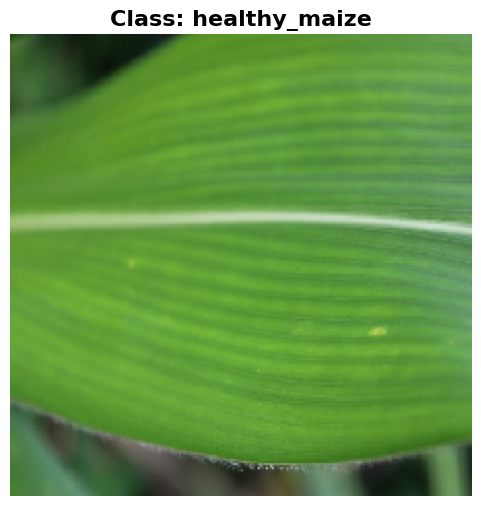

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Get class indices and initialize tracking for displayed classes
class_indices = train_generator.class_indices
classes = list(class_indices.keys())
displayed_classes = {class_name: False for class_name in classes}

# Function to display an image with better visualization
def display_image(image, class_name):
    plt.figure(figsize=(6, 6))  # Adjust figure size for better visualization
    plt.imshow(image)
    plt.title(f"Class: {class_name}", fontsize=16, fontweight='bold')  # Larger, bold title
    plt.axis('off')
    plt.show()

# Iterate through batches of images and labels
for images, labels in train_generator:
    for i in range(images.shape[0]):
        # Identify the class name for the current image
        label_index = np.argmax(labels[i])
        class_name = classes[label_index]

        # Display the image if it hasn't been displayed yet
        if not displayed_classes[class_name]:
            display_image(images[i], class_name)
            displayed_classes[class_name] = True

        # Break the loop if all classes have been displayed
        if all(displayed_classes.values()):
            break

    # Break the outer loop if all classes have been displayed
    if all(displayed_classes.values()):
        break


Run all the cells and the output must be clearly visible for all the cells.